In [1]:
from graph2vec import *
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import numpy as np
import os

In [2]:
os.environ['PYTHONHASHSEED'] = '0'

In [120]:
m2,g2 = train_embedding(input_path='../sample_data/', workers=12, dimensions=64)


Feature extraction started.



100%|████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 1060.64it/s]



Optimization started.



In [132]:
df = get_embedding(m2,g2,64)

In [133]:
df['graph'] = df['graph'].apply(lambda x: int(x.split('_')[1]))

In [135]:
df.sort_values(by= ['graph'], ignore_index= True, inplace=True)

In [170]:
df.head(10)

,graph,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63
0,0,0.642944,-0.302176,-0.191304,-0.161944,-0.475312,0.030289,-0.359190,-0.118651,0.452228,...,-0.157715,-0.669153,-0.479810,0.846437,0.729890,0.859498,0.911593,-0.183868,-0.696923,-0.899705
1,1,0.762763,-0.366342,-0.220148,-0.191002,-0.561068,0.045799,-0.421750,-0.131014,0.520660,...,-0.192252,-0.789556,-0.576180,0.996623,0.850251,1.019863,1.065397,-0.213121,-0.808671,-1.058352
2,2,0.497615,-0.237685,-0.142667,-0.126041,-0.400606,0.035021,-0.284221,-0.097927,0.338882,...,-0.134079,-0.532815,-0.379464,0.675725,0.553537,0.672248,0.691740,-0.150057,-0.573166,-0.711901
3,3,0.464729,-0.200275,-0.130877,-0.108364,-0.345038,0.024066,-0.260653,-0.082417,0.324795,...,-0.109294,-0.471668,-0.332690,0.617306,0.498517,0.607223,0.621890,-0.135388,-0.496906,-0.643354
4,4,0.427938,-0.203982,-0.117736,-0.111931,-0.334589,0.025101,-0.229382,-0.081888,0.297467,...,-0.118500,-0.449832,-0.320662,0.570910,0.463603,0.562192,0.585232,-0.143224,-0.482857,-0.606940
5,5,0.379540,-0.204289,-0.115309,-0.110184,-0.334833,0.015732,-0.201697,-0.112041,0.232710,...,-0.123044,-0.411856,-0.302890,0.507110,0.431144,0.511141,0.535378,-0.146521,-0.457360,-0.550900
6,6,0.342040,-0.202732,-0.112542,-0.091846,-0.344520,0.016200,-0.189214,-0.122792,0.202804,...,-0.126088,-0.376234,-0.280066,0.457878,0.432077,0.476533,0.496408,-0.161596,-0.441188,-0.526918
7,7,0.329357,-0.187143,-0.100928,-0.087102,-0.304950,0.016349,-0.166700,-0.100571,0.193122,...,-0.109569,-0.349633,-0.259919,0.423366,0.387768,0.429392,0.448269,-0.136939,-0.408182,-0.488387
8,8,0.296416,-0.142804,-0.080010,-0.081757,-0.238402,0.018149,-0.167739,-0.060958,0.206548,...,-0.077708,-0.317729,-0.233062,0.398856,0.323302,0.400821,0.404837,-0.099780,-0.335758,-0.420372
9,9,0.240252,-0.123385,-0.071966,-0.061294,-0.204961,0.020050,-0.134391,-0.051983,0.162186,...,-0.067568,-0.256985,-0.180337,0.325244,0.279478,0.322304,0.331227,-0.085958,-0.281195,-0.346680


In [157]:
df_diff = df.iloc[:,1:].apply(lambda x: x - df.loc[0],axis =1)
df_diff['graph'] = df['graph']

In [160]:
df_diff

,graph,x_0,x_1,x_10,x_11,x_12,x_13,x_14,x_15,x_16,...,x_58,x_59,x_6,x_60,x_61,x_62,x_63,x_7,x_8,x_9
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.119820,-0.064167,-0.128081,0.147668,0.094317,-0.095015,-0.020926,-0.109090,-0.048621,...,0.120361,0.160365,-0.062560,0.153804,-0.029253,-0.111748,-0.158647,-0.012363,0.068432,0.171045
2,2,-0.145328,0.064491,0.169922,-0.197788,-0.117641,0.144595,0.035542,0.147327,0.075954,...,-0.176354,-0.187251,0.074970,-0.219853,0.033811,0.123758,0.187804,0.020724,-0.113346,-0.193053
3,3,-0.178215,0.101900,0.236309,-0.272173,-0.150016,0.197961,0.050480,0.193926,0.096359,...,-0.231373,-0.252275,0.098537,-0.289703,0.048480,0.200017,0.256351,0.036234,-0.127433,-0.284275
4,4,-0.215006,0.098194,0.247479,-0.320798,-0.166596,0.227585,0.044744,0.224709,0.114965,...,-0.266288,-0.297306,0.129809,-0.326361,0.040644,0.214066,0.292765,0.036763,-0.154761,-0.325315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,-0.550620,0.262131,0.627317,-0.757993,-0.454545,0.538392,0.110392,0.564987,0.262523,...,-0.629957,-0.743335,0.316272,-0.788505,0.162001,0.598983,0.770741,0.095649,-0.397531,-0.802128
997,997,-0.569726,0.271493,0.643618,-0.775379,-0.458100,0.539379,0.118273,0.571653,0.272519,...,-0.639977,-0.751613,0.321293,-0.807431,0.153887,0.610687,0.793271,0.107445,-0.408347,-0.816350
998,998,-0.558822,0.269557,0.638511,-0.767209,-0.457330,0.540285,0.122892,0.567958,0.277678,...,-0.644966,-0.753219,0.322732,-0.809727,0.151884,0.605607,0.793942,0.096566,-0.399521,-0.830042
999,999,-0.571957,0.277859,0.654851,-0.786320,-0.468040,0.556731,0.117830,0.587644,0.282976,...,-0.660089,-0.768168,0.324638,-0.817498,0.159469,0.619395,0.808944,0.106071,-0.413297,-0.843594


In [141]:
data = df.iloc[:, 1:].values
cl = AgglomerativeClustering(n_clusters=6, compute_distances=True, linkage='complete').fit(data)

In [142]:
cl.labels_[:500]

array([5, 3, 4, 2, 2, 2, 2, 2, 0, 0, 3, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5,
       5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4, 5, 4, 5,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,

In [39]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

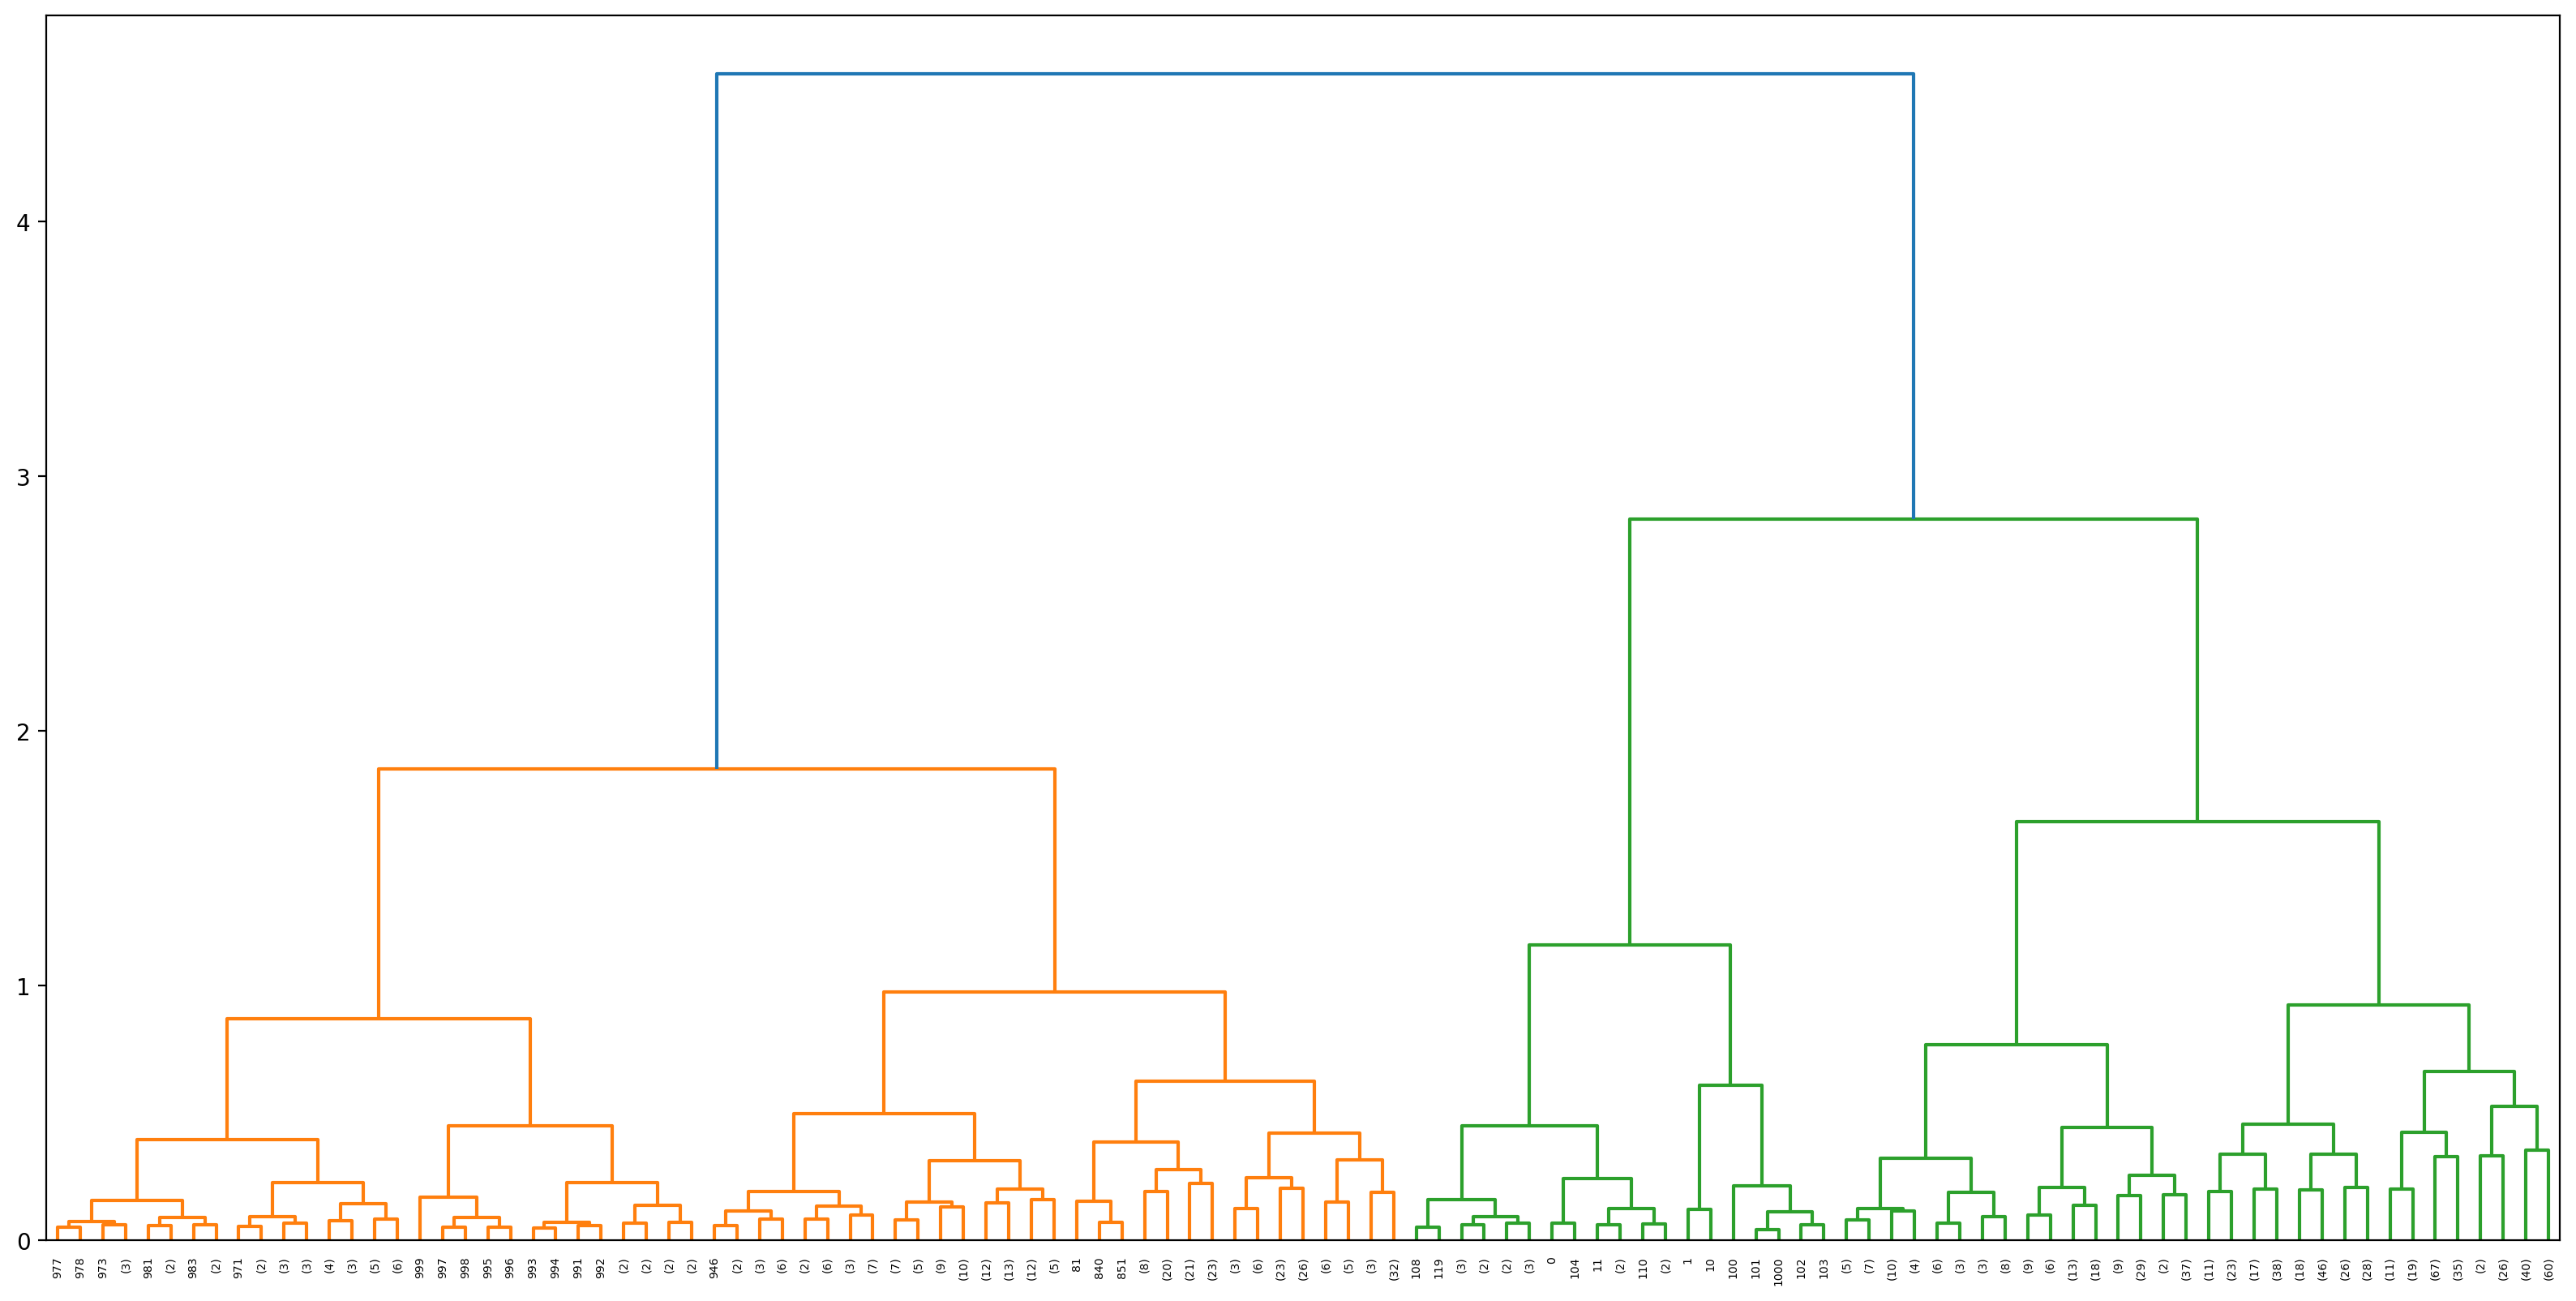

In [147]:
plt.figure(figsize=(20,10), dpi=200)
plot_dendrogram(cl, truncate_mode="level", p=6)

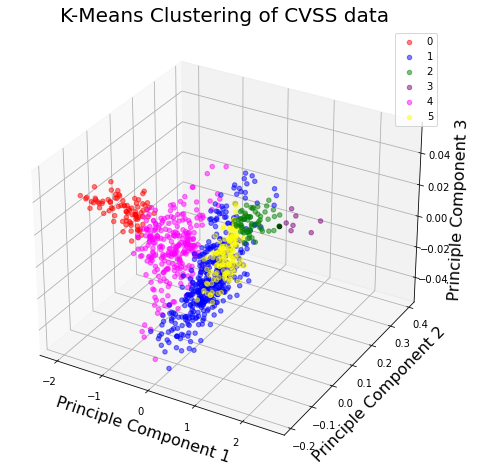

In [167]:
pca = PCA(n_components=3)
data_reduced = pca.fit_transform(df.iloc[:, 1:].values)

# model
cl = AgglomerativeClustering(n_clusters=6, linkage= 'complete').fit(data_reduced)

# plot
colours=["red","blue","green","purple", 'magenta', 'yellow']

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection = '3d')
for i in range(np.max(cl.labels_)+1):
    ax.scatter(data_reduced[cl.labels_==i][:,0], data_reduced[cl.labels_==i][:,1], data_reduced[cl.labels_==i][:,2], label=i, c=colours[i], alpha=0.5)
ax.scatter(data_reduced[[0]][:,0], data_reduced[[0]][:,1], data_reduced[[0]][:,2], c = 'black')
ax.set_title("K-Means Clustering of CVSS data",size=20)
ax.set_xlabel("Principle Component 1", size=16)
ax.set_ylabel("Principle Component 2", size=16)
ax.set_zlabel("Principle Component 3", size=16)
ax.legend()
plt.show()

In [164]:
df[cl.labels_==2]

,graph,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63
0,0,0.642944,-0.302176,-0.191304,-0.161944,-0.475312,0.030289,-0.359190,-0.118651,0.452228,...,-0.157715,-0.669153,-0.479810,0.846437,0.729890,0.859498,0.911593,-0.183868,-0.696923,-0.899705
11,11,0.629261,-0.293378,-0.186911,-0.163305,-0.458916,0.044644,-0.343416,-0.106153,0.424881,...,-0.148999,-0.637541,-0.465559,0.817623,0.687393,0.828949,0.865485,-0.171780,-0.667853,-0.862960
12,12,0.579428,-0.269284,-0.175434,-0.145267,-0.420987,0.047920,-0.315339,-0.090465,0.396709,...,-0.135549,-0.600546,-0.434217,0.759764,0.635625,0.773904,0.795684,-0.161363,-0.614891,-0.798008
13,13,0.572014,-0.261437,-0.163759,-0.135344,-0.409078,0.042859,-0.321906,-0.098276,0.383654,...,-0.140564,-0.581225,-0.423833,0.751167,0.625027,0.763299,0.783426,-0.161873,-0.612358,-0.788395
14,14,0.565365,-0.266041,-0.159030,-0.135713,-0.413386,0.040376,-0.315092,-0.096660,0.381823,...,-0.142588,-0.567800,-0.421668,0.732746,0.612305,0.745679,0.765769,-0.164126,-0.606207,-0.781454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,170,0.540097,-0.255116,-0.167174,-0.128254,-0.419798,0.031226,-0.306943,-0.105194,0.365137,...,-0.150479,-0.557783,-0.403138,0.722553,0.610938,0.735572,0.754471,-0.167341,-0.598656,-0.763463
171,171,0.538247,-0.251764,-0.154576,-0.121252,-0.409997,0.038809,-0.304613,-0.106473,0.361389,...,-0.139199,-0.563894,-0.406611,0.716549,0.606816,0.718434,0.748758,-0.161081,-0.599688,-0.762339
172,172,0.537222,-0.244051,-0.150649,-0.137135,-0.404989,0.037763,-0.295568,-0.092016,0.365044,...,-0.137827,-0.558103,-0.396288,0.709642,0.589014,0.721958,0.735640,-0.148236,-0.588793,-0.747019
175,175,0.533309,-0.251581,-0.151233,-0.137706,-0.420641,0.032455,-0.299780,-0.092355,0.361580,...,-0.149861,-0.556676,-0.409495,0.714624,0.607888,0.720002,0.749749,-0.167644,-0.600425,-0.756971


In [169]:
cl.labels_[:500]

array([2, 3, 5, 1, 1, 1, 1, 1, 4, 4, 3, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 5, 2, 2, 2, 5,
       2, 5, 5, 5, 2, 2, 5, 5, 2, 2, 2, 5, 2, 5, 5, 2, 2, 2, 2, 5, 5, 2,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1,
       5, 5, 5, 5, 5, 5, 1, 1, 5, 1, 5, 1, 1, 5, 1,

In [175]:
df.to_csv('../BNP_embedding.csv', index = False)

## another BNP

In [183]:
graphs = glob.glob(os.path.join('../sample_data_test/', "*.json"))

In [185]:
len(graphs)

1001

In [191]:
docs = Parallel(n_jobs=20)(delayed(feature_extractor)(g, 2) for g in tqdm(graphs))



  0%|                                                                                         | 0/1001 [00:00<?, ?it/s]

  4%|███▏                                                                            | 40/1001 [00:01<00:41, 23.15it/s]

  8%|██████▍                                                                         | 80/1001 [00:01<00:17, 51.61it/s]

 26%|████████████████████▎                                                         | 260/1001 [00:01<00:03, 219.31it/s]

 50%|██████████████████████████████████████▉                                       | 500/1001 [00:02<00:01, 460.19it/s]

 66%|███████████████████████████████████████████████████▍                          | 660/1001 [00:02<00:00, 593.40it/s]

100%|█████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:02<00:00, 424.62it/s]


In [204]:
out = []
for doc in docs:
    vec = m2.infer_vector(doc.words).tolist()
    out.append([int(doc.tags[0].split('_')[-1])] + vec)
column_names = ["graph"]+["x_"+str(dim) for dim in range(64)]
out = pd.DataFrame(out, columns=column_names)
out = out.sort_values(by = ["graph"])

In [206]:
out.reset_index(drop=True, inplace=True)

In [207]:
out

,graph,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63
0,0,0.111735,-0.350787,-0.205425,-0.083702,-0.758648,0.034369,-0.022437,-0.458211,-0.347259,...,-0.409327,-0.170225,-0.272987,0.139466,0.545933,0.201523,0.247908,-0.478021,-0.697496,-0.486956
1,1,0.423609,-0.142523,-0.068593,-0.123871,-0.190482,0.011914,-0.220838,-0.009770,0.372902,...,-0.032529,-0.397557,-0.267266,0.561565,0.337200,0.510795,0.554330,-0.056147,-0.329995,-0.524936
2,2,0.356091,-0.193621,-0.097980,-0.101634,-0.333376,0.020426,-0.183700,-0.105826,0.220985,...,-0.106981,-0.381985,-0.281502,0.473037,0.397234,0.455673,0.492180,-0.152274,-0.427856,-0.532079
3,3,0.351717,-0.183803,-0.096241,-0.113880,-0.297434,0.006278,-0.186563,-0.101821,0.244959,...,-0.102931,-0.355973,-0.271550,0.472836,0.360272,0.457385,0.474378,-0.142437,-0.403215,-0.512944
4,4,0.345807,-0.202443,-0.104781,-0.101386,-0.336316,0.025822,-0.178410,-0.123996,0.190581,...,-0.119290,-0.355172,-0.268021,0.450874,0.383041,0.435922,0.476712,-0.158298,-0.430927,-0.530323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,0.372651,-0.167012,-0.097919,-0.114666,-0.275613,0.017362,-0.203868,-0.061938,0.280512,...,-0.080634,-0.386932,-0.272902,0.504698,0.364654,0.475815,0.504252,-0.113251,-0.394873,-0.529776
997,997,0.350992,-0.187414,-0.095106,-0.118741,-0.329491,0.015299,-0.179057,-0.103157,0.217150,...,-0.110737,-0.359106,-0.266378,0.464821,0.377748,0.459970,0.483056,-0.153646,-0.406673,-0.524122
998,998,0.365452,-0.178082,-0.088350,-0.113286,-0.305108,0.008246,-0.185190,-0.081700,0.250283,...,-0.093212,-0.373947,-0.270145,0.494984,0.370980,0.463725,0.497621,-0.127960,-0.395398,-0.529829
999,999,0.336776,-0.217491,-0.108596,-0.106832,-0.352966,0.019070,-0.163401,-0.125166,0.193422,...,-0.126055,-0.371868,-0.281122,0.440491,0.396794,0.444169,0.488737,-0.181594,-0.427521,-0.542345


In [208]:
out.to_csv('../BNP_embedding_test.csv', index = False)